#### Stationarity of Fractionally Differenced Series

We will demonstrate a concept that if you vary the level of $d$ in your fractional differencing you will get varying levels of "stationarity". 

In [4]:
import pandas as pd 
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from fractional import FFDTransform, get_frac_weights

# Using the augmented dickey fuller test to test for stationarity
from statsmodels.tsa.stattools import adfuller

In [2]:
data = yf.download("BTC-USD", progress=False)
close_price = data['Adj Close']
log_price = close_price.apply(np.log)

In [24]:
ffd_transform = FFDTransform(d = 0.3, tol = 0.0001)
ffd_transform.fit(series = log_price)
ffd_series = ffd_transform.transform(series = log_price)

In [25]:
adfuller_test_results = adfuller(ffd_series.dropna())

In [30]:
test_stat = adfuller_test_results[0]
test_pvalue = adfuller_test_results[1]
print(test_pvalue)

0.04494690749324852


We see here that the p-value is below the usual threshold of 5% in order to say that this is a significant test. The null hypothesis of this test is that there is a unit root present which would imply that the series is not stationary. If we have a p-value below 5%, then we would reject the null hypothesis that there is a unit root which wold imply that this series is stationary. 


In [41]:
p_values = {} 

d_values = np.arange(start = 0.1, stop = 0.95, step=0.05)

In [44]:
for d in d_values: 
    ffd = FFDTransform(d = d, tol = 0.0001)
    series = ffd.fit_transform(series = log_price).dropna()
    p_value = adfuller(series)[1]
    p_values[d] = p_value

    print(f'The p-value for d={d} is {p_value:.3f}')

The p-value for d=0.1 is 0.248
The p-value for d=0.15000000000000002 is 0.222
The p-value for d=0.20000000000000004 is 0.172
The p-value for d=0.25000000000000006 is 0.174
The p-value for d=0.30000000000000004 is 0.045
The p-value for d=0.3500000000000001 is 0.011
The p-value for d=0.40000000000000013 is 0.005
The p-value for d=0.45000000000000007 is 0.012
The p-value for d=0.5000000000000001 is 0.004
The p-value for d=0.5500000000000002 is 0.001
The p-value for d=0.6000000000000002 is 0.000
The p-value for d=0.6500000000000001 is 0.000
The p-value for d=0.7000000000000002 is 0.000
The p-value for d=0.7500000000000002 is 0.000
The p-value for d=0.8000000000000002 is 0.000
The p-value for d=0.8500000000000002 is 0.000
The p-value for d=0.9000000000000002 is 0.000


In [47]:
p_values_series = pd.Series(p_values)

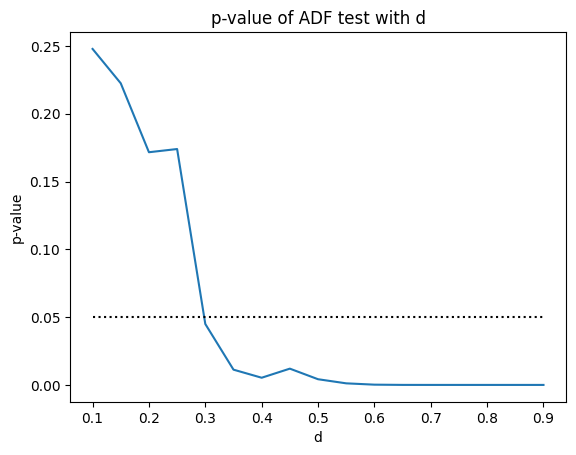

In [51]:
p_values_series.plot()
plt.title("p-value of ADF test with d")
plt.xlabel("d")
plt.ylabel("p-value")
plt.hlines(y = 0.05, xmin = d_values.min(), xmax = d_values.max(), color = 'black', linestyles='dotted')
plt.show()

In [63]:
d = round(p_values_series.index[np.where(p_values_series.values <= 0.05)[0].min()], 3)
d

0.3

We can see that a d-value of 0.3 gives us a series that we can consider to be stationary. If we keep differencing, we are still stationary but we are losing more and more memory from our time series. 

In [ ]:
def get_optimal_d_value(series: pd.Series, tol: float = 0.0001, p_value: float = 0.05) -> float: 

    assert p_value > 0, "p-value has to be greater than 0"
    assert tol > 0, "tolerance has to be greater than 0"

    